###  print out structures

In [1]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2,2, nout], lastReLU=False, weightsinit=2, debug_bw=False
)  # 1-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(1, 1 + nin ))
xinput = [Value(x, type="i%s" % index) for index,x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
# activation.backward()
print("activation",activation)

Module nn MLP: structure
[3, 2, 2, 1]
3
layers
[   Layer of [LinearNeuron(3), LinearNeuron(3)],
    Layer of [LinearNeuron(2), LinearNeuron(2)],
    Layer of [LinearNeuron(2)]]
L1
inputs
[   Value(name=v018,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0),
    Value(name=v019,layernumber=,neuronnumber=,weightnumber=,type=i2,data=2, grad=0),
    Value(name=v020,layernumber=,neuronnumber=,weightnumber=,type=i3,data=3, grad=0)]
activation Value(name=v044,layernumber=O,neuronnumber=N1,weightnumber=,type=a,data=12.600000000000003, grad=0)


In [3]:
def print_my_params(model):
        # print(model.layers)

        for l in model.layers:
                print("layer %s" % l.layernumber)
                # pp.pprint(l.parameters())
                for n in l.neurons:
                        print("neuron %s" % n.neuronnumber)
                        # pp.pprint(n.parameters())
                        for w in n.w:
                                # print(w)
                                print("layer %s neuron %s type %s data %.4f grad %.4f " % (l.layernumber,w.neuronnumber,w.type,w.data,w.grad))
                        print("layer %s neuron %s type %s data %.4f grad %.4f " % (l.layernumber,n.b.neuronnumber, n.b.type,n.b.data,n.b.grad))

# print_my_params(model)


i1 1
'L1N1'
'L1N2'
i2 2
'L1N1'
'L1N2'
i3 3
'L1N1'
'L1N2'
this layer L1 next layer L2
L1N1 to L2N1
L1N1 to L2N2
L1N2 to L2N1
L1N2 to L2N2
this layer L2 next layer O
L2N1 to ON1
L2N2 to ON1
this layer O next layer L1


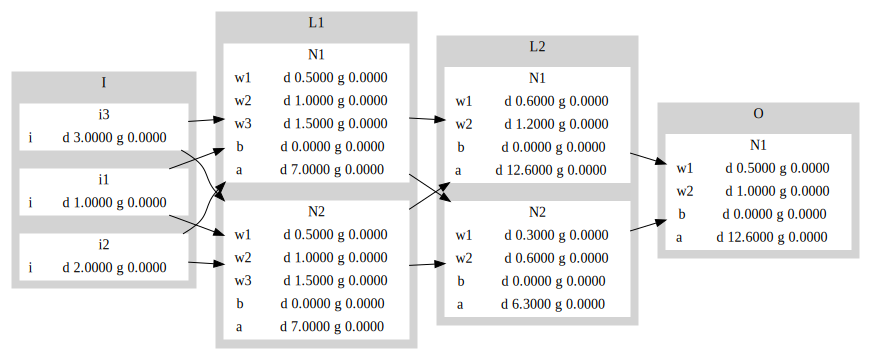

In [4]:
def draw_nn(inputs, model, debug_print_01=False):
    nn_dot = Digraph(
        format="svg", node_attr={"shape": "record"}, graph_attr={"rankdir": "LR"}
    )  # LR = left to right

    with nn_dot.subgraph(name="cluster_I") as c:
        c.attr(label="I")
        c.attr(style="filled", color="lightgrey")
        c.node_attr.update(style="filled", color="white")
        for i in inputs:
            istring = "|{i |d %.4f g %.4f}" % (i.data, i.grad)
            c.node(
                "%s" % (i.type),
                r"  %s %s}" % (i.type, istring),
            )

    for l in model.layers:
        # print("layer %s" % l.layernumber)

        with nn_dot.subgraph(name="cluster_%s" % l.layernumber) as c:
            c.attr(label=l.layernumber)
            c.attr(style="filled", color="lightgrey")
            c.node_attr.update(style="filled", color="white")

            for n in l.neurons:
                # print("neuron %s" % n.neuronnumber)
                wstring = ""
                for w in n.w:
                    wstring += "|{%s |d %.4f g %.4f}" % (w.type, w.data, w.grad)
                # print(wstring)

                bstring = "|{b |d %.4f g %.4f}" % (n.b.data, n.b.grad)
                # print(bstring)

                astring = "|{a |d %.4f g %.4f}" % (n.act.data, n.act.grad)
                # print(astring)

                lstring = l.layernumber
                # print(model.sz)

                c.node(
                    "%s%s" % (lstring, n.neuronnumber),
                    r"  %s %s %s %s}" % (n.neuronnumber, wstring, bstring, astring),
                )

    for i in inputs:
        print(i.type, i.data)
        # nn_dot.edge(i.type, "L1N1")
        for n in model.layers[0].neurons:
            nstring="%s%s" % (model.layers[0].layernumber,n.neuronnumber)
            pp.pprint(nstring)
            nn_dot.edge(i.type, nstring)


    for thiselem, nextelem in zip(model.layers, model.layers[1:] + model.layers[:1]):
        print(
            "this layer %s next layer %s" % (thiselem.layernumber, nextelem.layernumber)
        )
        for n in thiselem.neurons:
            for m in nextelem.neurons:
                if nextelem.layernumber != "L1":
                    # print("neuron %s" % n.neuronnumber)
                    edge1 = "%s%s" % (thiselem.layernumber, n.neuronnumber)
                    edge2 = "%s%s" % (nextelem.layernumber, m.neuronnumber)
                    print("%s to %s" % (edge1, edge2))
                    nn_dot.edge(edge1, edge2)

    return nn_dot


draw_nn(xinput, model)

i1 1
'L1N1'
'L1N2'
i2 2
'L1N1'
'L1N2'
i3 3
'L1N1'
'L1N2'
this layer L1 next layer L2
L1N1 to L2N1
L1N1 to L2N2
L1N2 to L2N1
L1N2 to L2N2
this layer L2 next layer O
L2N1 to ON1
L2N2 to ON1
this layer O next layer L1


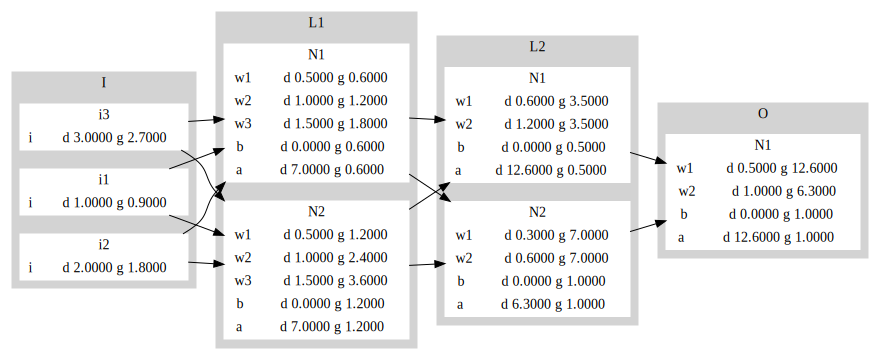

In [5]:
activation.backward()
draw_nn(xinput, model)